### 머신러닝을 위한 이미지 데이터 
- 기계 학습을 위한 데이터 준비

In [5]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(261, 280)


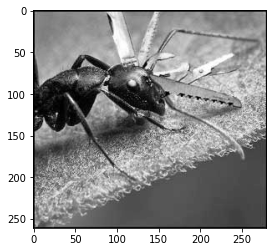

In [19]:
# 이미지 gray 스케일로 읽어오기(load)
#img = cv2.imread('./data/ants/swiss-army-ant.jpg', 0)
img = cv2.imread('./data/ants/swiss-army-ant.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
print(gray_img.shape)
plt.show()



(128, 128, 3)


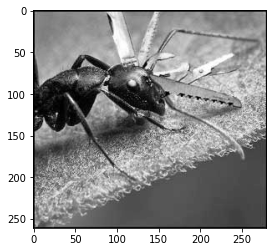

In [24]:
# 순서 바뀌면 이미지도 바뀜...?
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
gray_img = cv2.resize(img, (128, 128)) # 사이즈 정의


print(gray_img.shape)
plt.show()
#np.array(gray_img).flatten().tolist() # 모든 차원 없애고 1차원으로 바꿈! (리스트)

In [ ]:
# 행은 n번 이미지 / 픽셀값 열(필드)로 나열, 필드명 하나 변수들 => 설명변수
# 목적변수: 설명 변수의 답을 알려줌, 맨 마지막 오른쪽 끝에 위치  

In [25]:
# 전테 이미지 데이터 
# 이미지 폴더 정의 
dirs = ['ants', 'bees']



# 이미지에대한 설명변수(픽셀값)와 목적변수(레이블)의 값을 저장할 리스트 생성 
pixels = [] # 설명변수
labels = [] # 목적변수 

# 이미지를 읽어와 필요한 모양으로 데이터 처리 후 리스트 저장 
# enumerate(dirs) : 연속형 데이터에서 index와 value 원소를 동시에 접근 

for i, d in enumerate(dirs):
    # i = 0 or '1
    # d = 'ants' or 'bees'
    
    # 파일명 취득
    files = os.listdir('./data/'+ d) 
    #print(files)
    
    for f in files:
        # 이미지 그레이 스케일로 읽어오기
        img = cv2.imread('./data/' + d + "/" + f, 0) # 그레이->인자로 0을 넣어줌 
        
        # 모든 이미지 크기(해상도) 변경: 128*128 
        # 설명변수의 크기는 모두 같아야함! 
        img = cv2.resize(img, (128, 128))
        
        # 픽셀값 추가 
        img = np.array(img)
        
        # 현재 이미지 3차원 배열 -> 배열값 각각 다른 형태! 
        # 하나의 데이터 형태러로 바꿔주어야함
        
        # 픽셀값 추가 
        img = np.array(img).flatten().tolist()
        pixels.append(img) # 데이터 갯수(128*128 ) = 이미지 하나에대한 정보 ! 
        
        # 이미지에 대한 레이블 리스트 추가  
        labels.append(i)

In [29]:
print(pixels[0])

[148, 143, 144, 127, 129, 142, 142, 140, 143, 160, 175, 177, 172, 173, 171, 164, 167, 176, 174, 174, 174, 173, 175, 177, 178, 180, 178, 178, 175, 177, 182, 178, 176, 171, 171, 170, 169, 168, 153, 159, 163, 162, 165, 166, 155, 164, 182, 181, 174, 175, 174, 154, 162, 168, 173, 171, 175, 175, 176, 169, 160, 168, 155, 162, 158, 156, 165, 157, 151, 141, 142, 143, 138, 143, 141, 162, 176, 177, 173, 175, 174, 181, 178, 183, 187, 183, 181, 183, 179, 179, 168, 161, 160, 168, 162, 151, 150, 154, 149, 148, 157, 156, 155, 166, 165, 159, 163, 161, 146, 157, 135, 150, 146, 150, 149, 157, 139, 134, 140, 137, 139, 136, 132, 131, 132, 114, 119, 144, 145, 136, 135, 137, 137, 143, 144, 137, 149, 171, 174, 176, 170, 170, 167, 164, 163, 167, 171, 172, 170, 173, 177, 169, 175, 178, 179, 178, 173, 172, 166, 176, 172, 173, 171, 170, 169, 167, 162, 167, 163, 166, 164, 169, 169, 174, 174, 181, 177, 176, 172, 168, 172, 172, 172, 170, 174, 171, 171, 162, 158, 157, 162, 164, 161, 158, 159, 156, 147, 151, 146, 146,

#### [참고] 정규화
- 참조: https://wikidocs.net/87189
- 최소, 최대 정규호 
- 특성들의 범위가 0~1 사이 ([0,1])가 되오록 비례적으로 맞추기
- 여기서 정규화는 정규분포가 아니라 단순히 특성들의 범위를 맞추는 것을 의미

In [37]:
# 데이터가 너무 크기때문에 먼저 255로 나눠서 정규화 시킨 뒤 
# 나중에 다시 255 곱해주기

# 픽셀값을 DataFrame 형식으로 변환 
pixels_df = pd.DataFrame(pixels)
pixels_df = pixels_df/255 # 0~1 (최소 최대 정규화)

# 레이블값을 DataFrame 형식으로 변환 
labels_df = pd.DataFrame(labels, columns=['label'])

# 위에서 만들어진 두 df를 수평결합(열 추가->오른쪽으로 추가)
img_data = pd.concat([pixels_df, labels_df], axis=1) 

display(img_data.head())
display(img_data.tail())

# 결과값 필드 갯수: 128 x 128 = 16384 
# 행: 하나의 이미지 
# label 필드: ants'(0) or 'bees'(1)


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.580392,0.560784,0.564706,0.498039,0.505882,0.556863,0.556863,0.549020,0.560784,0.627451,...,0.156863,0.168627,0.160784,0.156863,0.152941,0.141176,0.145098,0.129412,0.137255,0
1,0.321569,0.321569,0.321569,0.301961,0.294118,0.301961,0.317647,0.305882,0.294118,0.278431,...,0.486275,0.474510,0.462745,0.447059,0.427451,0.411765,0.384314,0.364706,0.345098,0
2,0.152941,0.149020,0.145098,0.141176,0.141176,0.145098,0.152941,0.160784,0.172549,0.184314,...,0.203922,0.196078,0.176471,0.168627,0.160784,0.149020,0.141176,0.141176,0.137255,0
3,0.749020,0.745098,0.729412,0.737255,0.737255,0.737255,0.729412,0.721569,0.721569,0.729412,...,0.505882,0.317647,0.309804,0.615686,0.556863,0.627451,0.490196,0.396078,0.450980,0
4,0.015686,0.035294,0.007843,0.003922,0.027451,0.023529,0.015686,0.019608,0.019608,0.019608,...,0.125490,0.129412,0.129412,0.129412,0.129412,0.133333,0.113725,0.137255,0.090196,0


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
152,0.996078,0.980392,0.992157,1.000000,0.956863,0.890196,0.898039,0.992157,0.996078,0.980392,...,0.792157,0.717647,0.643137,0.607843,0.462745,0.454902,0.458824,0.458824,0.454902,1
153,0.309804,0.317647,0.317647,0.325490,0.333333,0.337255,0.341176,0.345098,0.356863,0.364706,...,0.219608,0.200000,0.196078,0.200000,0.196078,0.196078,0.192157,0.184314,0.176471,1
154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
155,0.490196,0.521569,0.592157,0.564706,0.552941,0.517647,0.478431,0.427451,0.400000,0.525490,...,0.176471,0.200000,0.227451,0.235294,0.239216,0.266667,0.254902,0.235294,0.215686,1
156,0.486275,0.505882,0.501961,0.509804,0.537255,0.490196,0.478431,0.490196,0.647059,0.709804,...,0.129412,0.109804,0.141176,0.149020,0.137255,0.133333,0.207843,0.325490,0.392157,1


In [38]:
pixels_df


,0,1,2,3,4,5,6,7,8,9,...,16374,16375,16376,16377,16378,16379,16380,16381,16382,16383
0,0.580392,0.560784,0.564706,0.498039,0.505882,0.556863,0.556863,0.549020,0.560784,0.627451,...,0.180392,0.156863,0.168627,0.160784,0.156863,0.152941,0.141176,0.145098,0.129412,0.137255
1,0.321569,0.321569,0.321569,0.301961,0.294118,0.301961,0.317647,0.305882,0.294118,0.278431,...,0.498039,0.486275,0.474510,0.462745,0.447059,0.427451,0.411765,0.384314,0.364706,0.345098
2,0.152941,0.149020,0.145098,0.141176,0.141176,0.145098,0.152941,0.160784,0.172549,0.184314,...,0.200000,0.203922,0.196078,0.176471,0.168627,0.160784,0.149020,0.141176,0.141176,0.137255
3,0.749020,0.745098,0.729412,0.737255,0.737255,0.737255,0.729412,0.721569,0.721569,0.729412,...,0.490196,0.505882,0.317647,0.309804,0.615686,0.556863,0.627451,0.490196,0.396078,0.450980
4,0.015686,0.035294,0.007843,0.003922,0.027451,0.023529,0.015686,0.019608,0.019608,0.019608,...,0.121569,0.125490,0.129412,0.129412,0.129412,0.129412,0.133333,0.113725,0.137255,0.090196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.996078,0.980392,0.992157,1.000000,0.956863,0.890196,0.898039,0.992157,0.996078,0.980392,...,0.835294,0.792157,0.717647,0.643137,0.607843,0.462745,0.454902,0.458824,0.458824,0.454902
153,0.309804,0.317647,0.317647,0.325490,0.333333,0.337255,0.341176,0.345098,0.356863,0.364706,...,0.286275,0.219608,0.200000,0.196078,0.200000,0.196078,0.196078,0.192157,0.184314,0.176471
154,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
155,0.490196,0.521569,0.592157,0.564706,0.552941,0.517647,0.478431,0.427451,0.400000,0.525490,...,0.352941,0.176471,0.200000,0.227451,0.235294,0.239216,0.266667,0.254902,0.235294,0.215686


### [미션] 컬러 이미지에 대한 설명변수/목적변수 세트 생성 
- 설명변수: pixelsC / 목적변수: labelsC
- 폴더와 파일명 가져오기
- 그레이 => 2차원 / 컬러 => 3차원
 * cv2를 이용해 데이터 읽어오기
 * 이미지 사이즈를 128x128로 변경 
 * 픽셀을 B, G, R 단위로 분할
 * np.array()로 변환 => flatten() => tolist()로 변경해 각각 저장 
 * 변경 데이터는 설명변수와 목적변수에 저장 
- 데이터를 DataFrame 형식으로 변경 
 * 설명Df: Max/Min 정규화
 * 목적Df: 컬럼명 지정 
 * 설명Df : 설명Df+목적Df (열 병합)

In [49]:
# flatten() 예시 
x = np.array([[10,20], [22,13], [55,20]])
print(x.flatten()) # 리스트 구조 X (쉼표 구분 x)
print(type(x.flatten())) 

print(x.flatten().tolist())
print(type(x.flatten().tolist())) # 1차원 리스트 구조로 변경  (쉼표 구분)

[10 20 22 13 55 20]
<class 'numpy.ndarray'>
[10, 20, 22, 13, 55, 20]
<class 'list'>


In [50]:
dirs = ['ants', 'bees']
pixelsC = []
labelsC = []

for i,d in enumerate(dirs):
    files = os.listdir('./data/'+ d) 
    
    for f in files:
        img2 = cv2.imread('./data/'+d+'/'+f) # BGR 형식을 읽어오기
        img2 = cv2.resize(img2, (128, 128))      # 이미지 크기 변경
       
        b, g, r = cv2.split(img2)
        
        
        # 픽셀값을 flatten()로 1차원 배열 형식으로 변경 
        # tolist()를 이용해 리스트 형식으로 변경
        b = np.array(b).flatten().tolist()
        g = np.array(g).flatten().tolist()
        r = np.array(r).flatten().tolist()
        
        pixelsC.append(b + g + r) # 리스트 더해도 같은 리스트 구조 
        
        labelsC.append(i)    # 레이블 리스트 추가      

In [52]:
# 픽셀값을 DataFrame 형식으로 변환 
pixelsC_df = pd.DataFrame(pixelsC)
pixelsC_df = pixels_df/255 # 0~1 (최소 최대 정규화)

# 레이블값을 DataFrame 형식으로 변환 
labelsC_df = pd.DataFrame(labelsC, columns=['label'])

# 위에서 만들어진 두 df를 수평결합(열 추가->오른쪽으로 추가)
img_dataC = pd.concat([pixelsC_df, labelsC_df], axis=1) 

display(img_dataC.head())
display(img_dataC.tail())



,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,0.002276,0.002199,0.002215,0.001953,0.001984,0.002184,0.002184,0.002153,0.002199,0.002461,...,0.000615,0.000661,0.000631,0.000615,0.000600,0.000554,0.000569,0.000507,0.000538,0
1,0.001261,0.001261,0.001261,0.001184,0.001153,0.001184,0.001246,0.001200,0.001153,0.001092,...,0.001907,0.001861,0.001815,0.001753,0.001676,0.001615,0.001507,0.001430,0.001353,0
2,0.000600,0.000584,0.000569,0.000554,0.000554,0.000569,0.000600,0.000631,0.000677,0.000723,...,0.000800,0.000769,0.000692,0.000661,0.000631,0.000584,0.000554,0.000554,0.000538,0
3,0.002937,0.002922,0.002860,0.002891,0.002891,0.002891,0.002860,0.002830,0.002830,0.002860,...,0.001984,0.001246,0.001215,0.002414,0.002184,0.002461,0.001922,0.001553,0.001769,0
4,0.000062,0.000138,0.000031,0.000015,0.000108,0.000092,0.000062,0.000077,0.000077,0.000077,...,0.000492,0.000507,0.000507,0.000507,0.000507,0.000523,0.000446,0.000538,0.000354,0


,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
152,0.003906,0.003845,0.003891,0.003922,0.003752,0.003491,0.003522,0.003891,0.003906,0.003845,...,0.003106,0.002814,0.002522,0.002384,0.001815,0.001784,0.001799,0.001799,0.001784,1
153,0.001215,0.001246,0.001246,0.001276,0.001307,0.001323,0.001338,0.001353,0.001399,0.001430,...,0.000861,0.000784,0.000769,0.000784,0.000769,0.000769,0.000754,0.000723,0.000692,1
154,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,...,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,0.003922,1
155,0.001922,0.002045,0.002322,0.002215,0.002168,0.002030,0.001876,0.001676,0.001569,0.002061,...,0.000692,0.000784,0.000892,0.000923,0.000938,0.001046,0.001000,0.000923,0.000846,1
156,0.001907,0.001984,0.001968,0.001999,0.002107,0.001922,0.001876,0.001922,0.002537,0.002784,...,0.000507,0.000431,0.000554,0.000584,0.000538,0.000523,0.000815,0.001276,0.001538,1


In [54]:
# gray (2차원)
# 이미지 첫 번째 행 데이터 
img_data.iloc[0, :128] 

0      0.580392
1      0.560784
2      0.564706
3      0.498039
4      0.505882
         ...   
123    0.513725
124    0.517647
125    0.447059
126    0.466667
127    0.564706
Name: 0, Length: 128, dtype: float64

In [53]:
# BGR(3차원)
img_dataC.iloc[0, :128] 

0      0.002276
1      0.002199
2      0.002215
3      0.001953
4      0.001984
         ...   
123    0.002015
124    0.002030
125    0.001753
126    0.001830
127    0.002215
Name: 0, Length: 128, dtype: float64